In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords


In [ ]:
df = pd.read_csv('/work/tweet.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [ ]:
df.describe()

,sentimen,tweet
count,1815,1815
unique,3,1815
top,positif,Kata @prabowo Indonesia tidak dihargai bangsa ...
freq,612,1


In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"sentimen","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"sentimen","scale":{"scheme":"deepnote10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"sort":null,"type":"nominal","field":"sentimen","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","aggregate":"count"},"color":{"sort":null,"type":"nominal","field":"sentimen","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

# PreProcessing

In [ ]:
df.sample(5)

,sentimen,tweet
1805,negatif,Berkat Jokowi masa depan tampak suram bagi per...
758,negatif,"Prabowo itu buta tentang penerima negara, bahw..."
606,negatif,"Berharap tiap bulan bulan ada pemilu,terus Jok..."
312,netral,"Presiden Joko Widodo (Jokowi) mengatakan, terk..."
1452,positif,Capres 02 bilang didebat keadaan ekonomi Indon...


## Cleaning

In [ ]:
data = df['tweet'].tolist()

In [ ]:
nltk.download('stopwords')

def remove_stopwords(text):
  # get stopwords dictionary
  stop_words = set(stopwords.words('indonesian'))


  # remove stopwords
  cleaned_text = ' '.join([word for word in text.lower().split() if word not in stop_words])
  return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_stopwords = [remove_stopwords(text) for text in data]

print("BEFORE")
print("="*50)
display(data[:1])
print("\nAFTER")
print("="*50)
display(cleaned_stopwords[:1])

BEFORE


['@prabowo indonesia dihargai bangsa asing! berita ðÿ‘‡ hoax buatan penguasa, ya @rockygerung?ðÿ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21â â€¦']


AFTER


['@prabowo indonesia dihargai bangsa asing! berita ðÿ‘‡ hoax buatan penguasa, ya @rockygerung?ðÿ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21â â€¦']

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: remove_stopwords(x))

In [ ]:
import re
import string
from nltk.tokenize import TweetTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji

factory = StemmerFactory()
stemmer = factory.create_stemmer()

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

def preprocess_tweet(tweet):
    # Remove URLs (including pic.twitter.com links)
    tweet = re.sub(r'https?://\S+|pic.twitter.com/\S+', '', tweet)

    # Remove non-ASCII characters
    tweet = tweet.encode('ascii', 'ignore').decode('utf-8')

    # Convert emojis into textual representation
    tweet = emoji.demojize(tweet)

    # Remove 'yg'
    tweet = tweet.replace('yg', '')

    # Convert to ASCII representation
    tweet = ''.join(char for char in tweet if char in string.printable)

    # Remove extra spaces
    tweet = ' '.join(tweet.split())

    # Clean punctuation and special characters
    tweet = re.sub(r'[^\w\s@#]', '', tweet)
    tweet_tokens = tknzr.tokenize(tweet)
    # Stemming with Sastrawi
    tweet_tokens = [stemmer.stem(word) for word in tweet_tokens]

    return tweet_tokens

In [ ]:
data = df['tweet'].tolist()
cleaned_tweet = [preprocess_tweet(text) for text in data]

print("BEFORE")
print("="*50)
display(data[:1])
print("\nAFTER")
print("="*50)
display(cleaned_tweet[:1])

BEFORE


['Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦']


AFTER


[['kata',
  'indonesia',
  'tidak',
  'harga',
  'bangsa',
  'asing',
  'berita',
  'ini',
  'pasti',
  'hoax',
  'buat',
  'kuasa',
  'ya',
  'kan']]

In [ ]:
mentions_list = []
hashtags_list = []
for tweet in cleaned_tweet:
    mentions = re.findall(r'@(\w+)', tweet)
    hashtags = re.findall(r'#(\w+)', tweet)
    mentions_list.append(mentions)
    hashtags_list.append(hashtags)
# Add new features (mentions and hashtags) to your DataFrame
df['mentions'] = mentions_list
df['hashtags'] = hashtags_list


In [ ]:

# Print a sample of the updated DataFrame
df[['tweet', 'mentions', 'hashtags']].sample(5)

,tweet,mentions,hashtags
448,@sandiuno @prabowo @mardanialisera @fadlizon p...,"[sandiuno, prabowo, mardanialisera, fadlizon]","[prabowosalahkansby, koalisiprabohong, wowocap..."
284,bukti harga barang turun tol ???,[],[]
1010,nanya kulihat prabowo ahli militer sandi ahli ...,[],[]
929,"infrastruktur dimakan, kedaulatan pangan, miki...",[],[]
363,"mas ari narang, prabowo sandi horang kayah. se...",[],[]


In [ ]:
from nltk.tokenize import TweetTokenizer

# Initialize
tknzr = TweetTokenizer()

cleaned_tweet = [tknzr.tokenize(tweet) for tweet in cleaned_tweet]
cleaned_tweet

[['@prabowo',
  'indonesia',
  'dihargai',
  'bangsa',
  'asing',
  'berita',
  'hoax',
  'buatan',
  'penguasa',
  'ya',
  '@rockygerung'],
 ['batuan',
  'langka',
  'tasbih',
  'jokowi',
  'hadiah',
  'habib',
  'luthfi',
  'seharga',
  'mercy'],
 ['era',
  'jokowi',
  'ekonomi',
  'indonesia',
  'baik',
  '#01indonesiamaju',
  '#jokowilagi',
  '#jokowimenangtotaldebat'],
 ['sumatera',
  'selatan',
  'asian',
  'games',
  'berdampak',
  'pd',
  'ekonomi',
  'langsung',
  'diprediksi',
  'mencapai',
  '185',
  'triliun',
  'indonesia',
  'maju',
  'jokowi',
  'hebat'],
 ['negara',
  'ngutang',
  'bngun',
  'infrastruktur',
  'udah',
  'dipake',
  'masyarakat',
  'masyarakatnya',
  'ngeluh',
  'negara',
  'ngutang',
  'negara',
  'ngutang',
  'utang',
  'dibayar',
  'kalo',
  'negara',
  'dapet',
  'penghasilan',
  'penghasilan',
  'negara',
  'ya',
  'pajak'],
 ['yg',
  'bisikin',
  'jokowi',
  'cm',
  'mikirin',
  'perputaran',
  'duit',
  'golongan',
  'tertentu',
  'esports',
  'dr

In [ ]:
import itertools
from collections import Counter, OrderedDict

In [ ]:
tokenized_words_flattened = list(itertools.chain(*cleaned_tweet))
tokenized_words_count = Counter(tokenized_words_flattened)
tokenized_words_count_sorted = OrderedDict(sorted(tokenized_words_count.items(), key = lambda kv : kv[1], reverse=False))

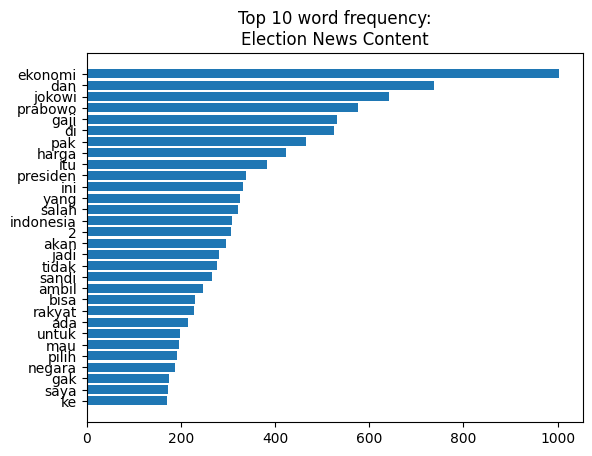

In [ ]:
import matplotlib.pyplot as plt

plt.barh(
    list(tokenized_words_count_sorted.keys())[-30:],
    list(tokenized_words_count_sorted.values())[-30:]
)
plt.title('Top 10 word frequency:\nElection News Content')
plt.show()

In [ ]:
cleaned_tweet

[['kata',
  'indonesia',
  'tidak',
  'harga',
  'bangsa',
  'asing',
  'berita',
  'ini',
  'pasti',
  'hoax',
  'buat',
  'kuasa',
  'ya',
  'kan'],
 ['batu',
  'langka',
  'tasbih',
  'jokowi',
  'hadiah',
  'dari',
  'habib',
  'luthfi',
  'harga',
  'mercy'],
 ['di',
  'era',
  'jokowi',
  'ekonomi',
  'indonesia',
  'makin',
  'baik',
  '01indonesiamaju',
  'jokowilagi',
  'jokowimenangtotaldebat'],
 ['bagi',
  'sumatera',
  'selatan',
  'asi',
  'games',
  'dampak',
  'pd',
  'ekonomi',
  'langsung',
  'prediksi',
  'capai',
  '185',
  'triliun',
  'indonesia',
  'maju',
  'jokowi',
  'hebat'],
 ['negara',
  'kita',
  'ngutang',
  'buat',
  'bngun',
  'infrastruktur',
  'yang',
  'udah',
  'dipake',
  'masyarakat',
  'terus',
  'masyarakat',
  'ngeluh',
  'karena',
  'negara',
  'ngutang',
  'tiap',
  'negara',
  'itu',
  'pasti',
  'ngutang',
  'utang',
  'bisa',
  'bayar',
  'kalo',
  'negara',
  'dapet',
  'hasil',
  'hasil',
  'negara',
  'itu',
  'ya',
  'dari',
  'pajak'],

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b3c5800-c216-4f08-93af-5173ca1bb328' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>